In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Optional: warnings
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('GlobalWeatherRepository.csv')

# Display first 5 rows
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
# Check missing values
print(df.isnull().sum())

# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Convert sunrise, sunset, moonrise, moonset to datetime (only time if needed)
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce').dt.time
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce').dt.time
df['moonrise'] = pd.to_datetime(df['moonrise'], errors='coerce').dt.time
df['moonset'] = pd.to_datetime(df['moonset'], errors='coerce').dt.time

# Create a simplified AQI category
def aqi_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df['AQI_category'] = df['air_quality_us-epa-index'].apply(aqi_category)


country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

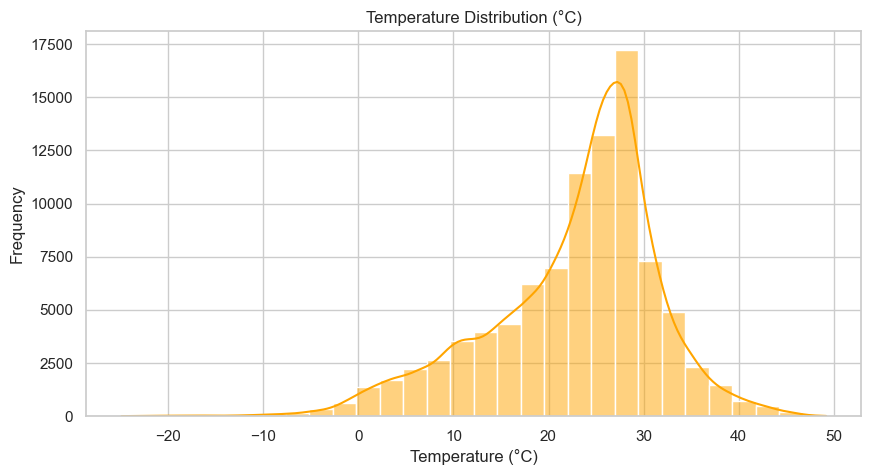

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True, color='orange')
plt.title('Temperature Distribution (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


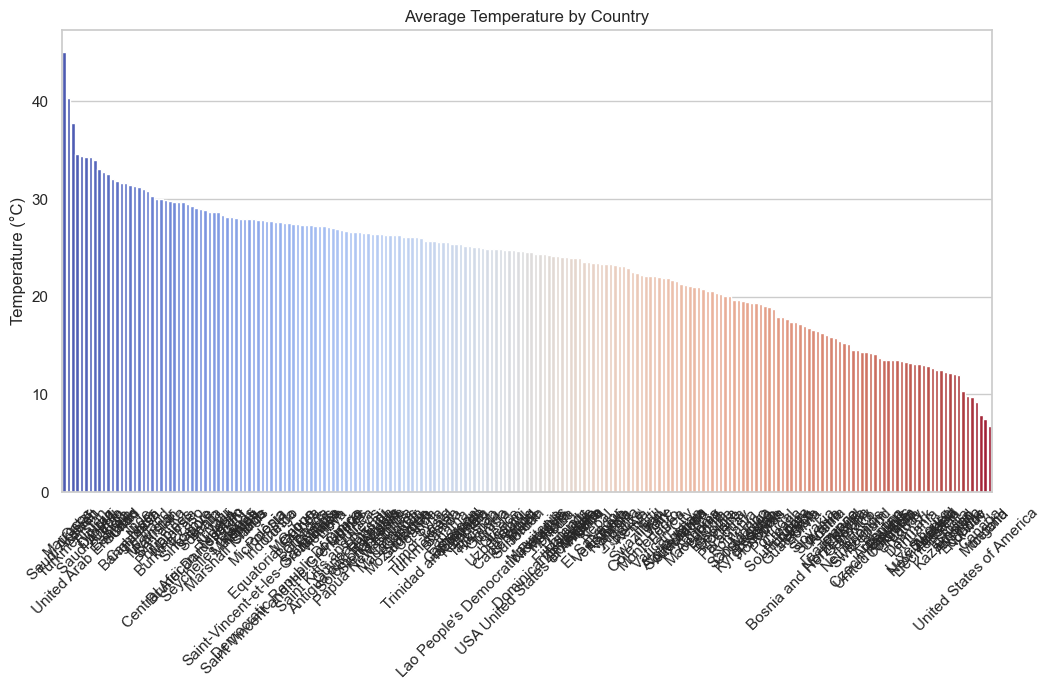

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average temperature by country
avg_temp_country = df.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=list(avg_temp_country.index), y=avg_temp_country.values, palette='coolwarm')
plt.title('Average Temperature by Country')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

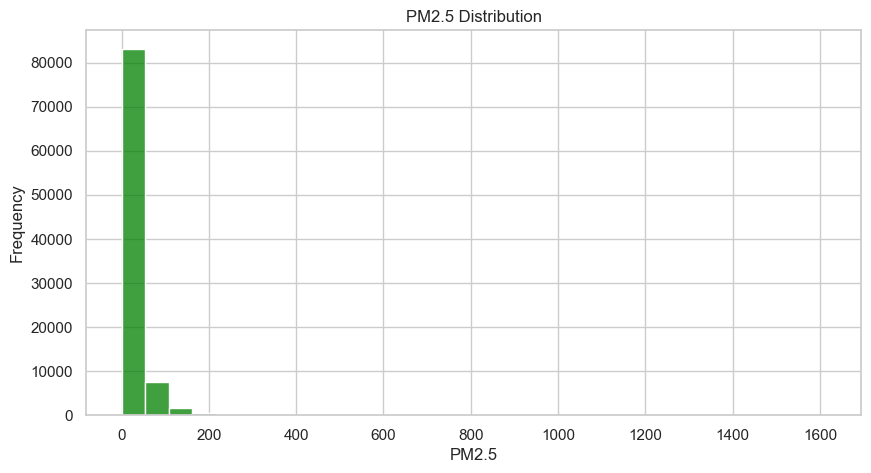

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(df['air_quality_PM2.5'], bins=30, color='green')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

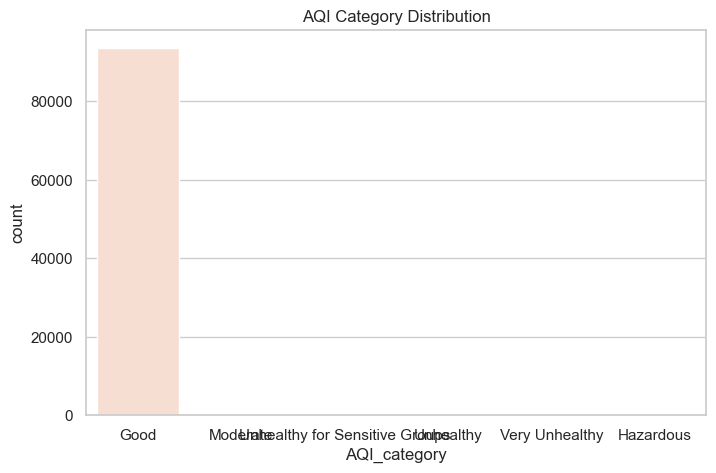

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='AQI_category', order=['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'], palette='Reds')
plt.title('AQI Category Distribution')
plt.show()

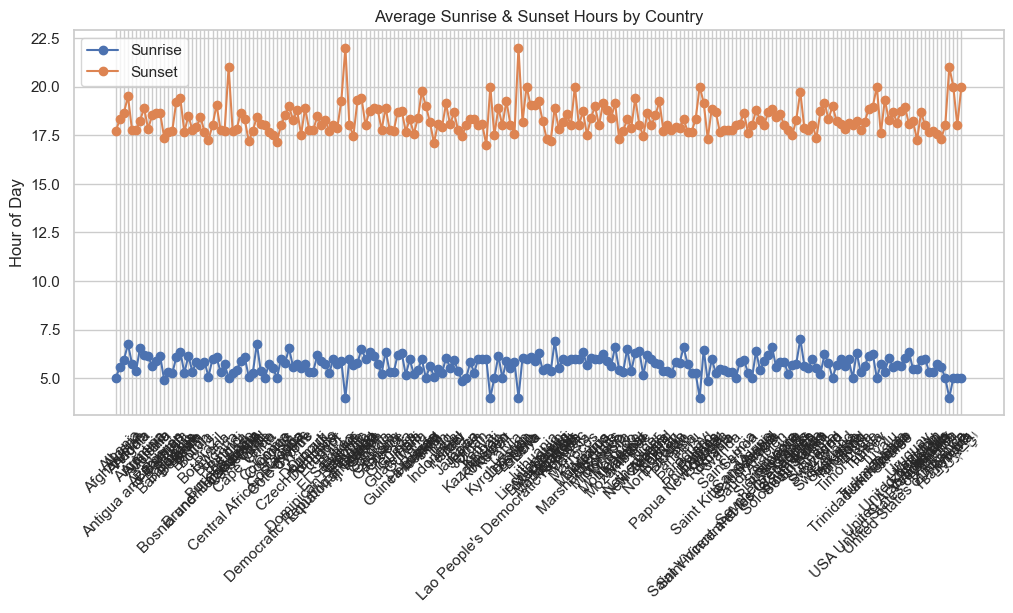

In [8]:
df['sunrise_hour'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S', errors='coerce').dt.hour
df['sunset_hour'] = pd.to_datetime(df['sunset'], format='%H:%M:%S', errors='coerce').dt.hour

# Average sunrise and sunset by country
sunrise_country = df.groupby('country')['sunrise_hour'].mean()
sunset_country = df.groupby('country')['sunset_hour'].mean()

plt.figure(figsize=(12,5))
plt.plot(sunrise_country.index, sunrise_country.values, label='Sunrise', marker='o')
plt.plot(sunset_country.index, sunset_country.values, label='Sunset', marker='o')
plt.xticks(rotation=45)
plt.title('Average Sunrise & Sunset Hours by Country')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

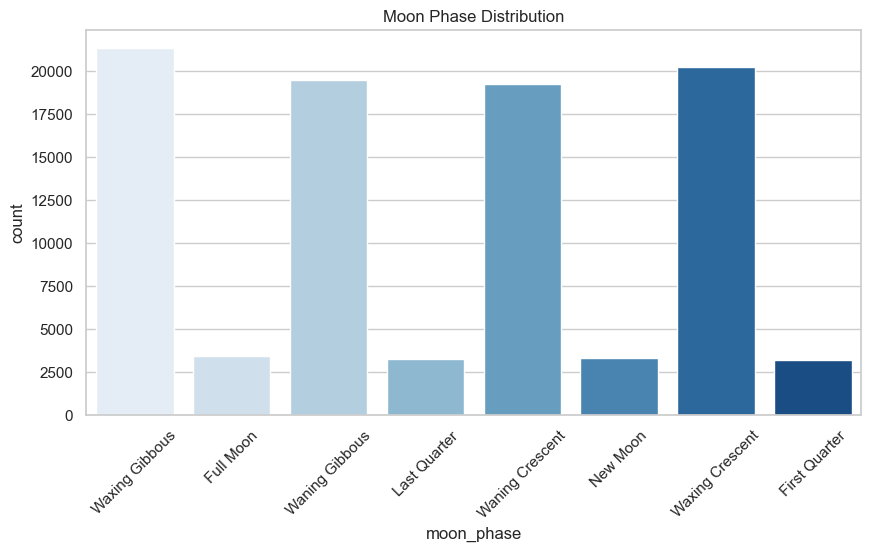

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='moon_phase', data=df, palette='Blues')
plt.title('Moon Phase Distribution')
plt.xticks(rotation=45)
plt.show()

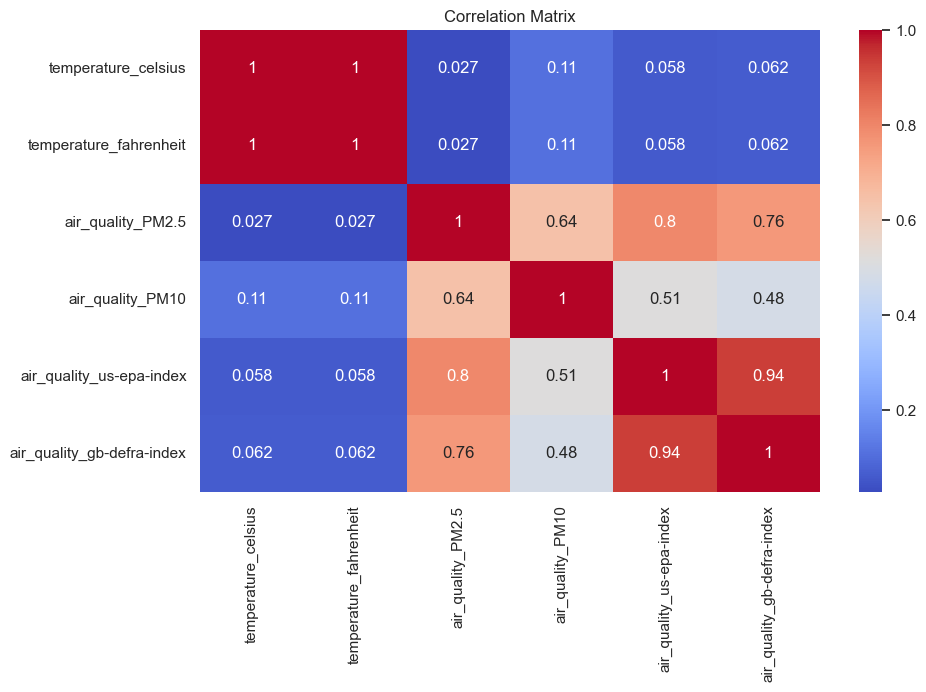

In [10]:
num_cols = ['temperature_celsius', 'temperature_fahrenheit', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Mean Squared Error: 0.98
R-squared: 0.00


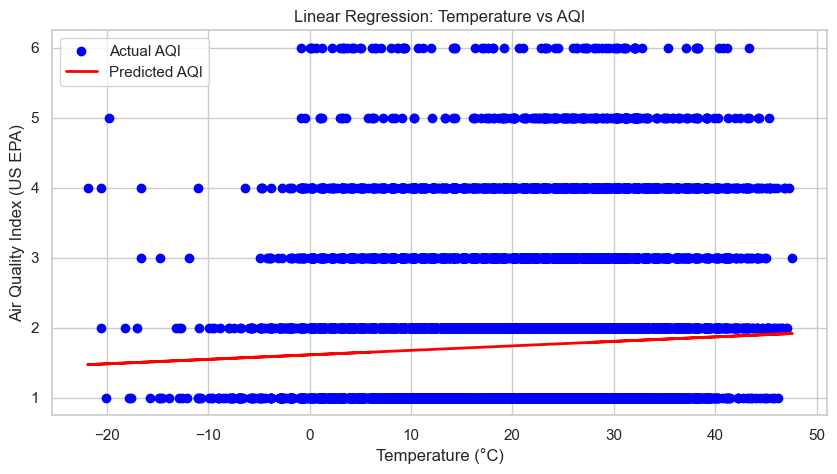

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use temperature_celsius to predict air_quality_us-epa-index
X = df[['temperature_celsius']]  # Feature
y = df['air_quality_us-epa-index']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot regression
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual AQI')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted AQI')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index (US EPA)')
plt.title('Linear Regression: Temperature vs AQI')
plt.legend()
plt.show()

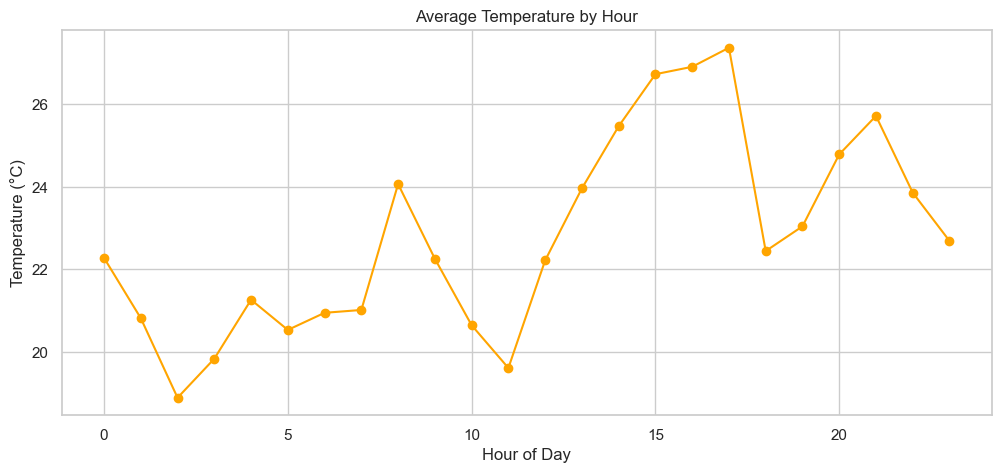

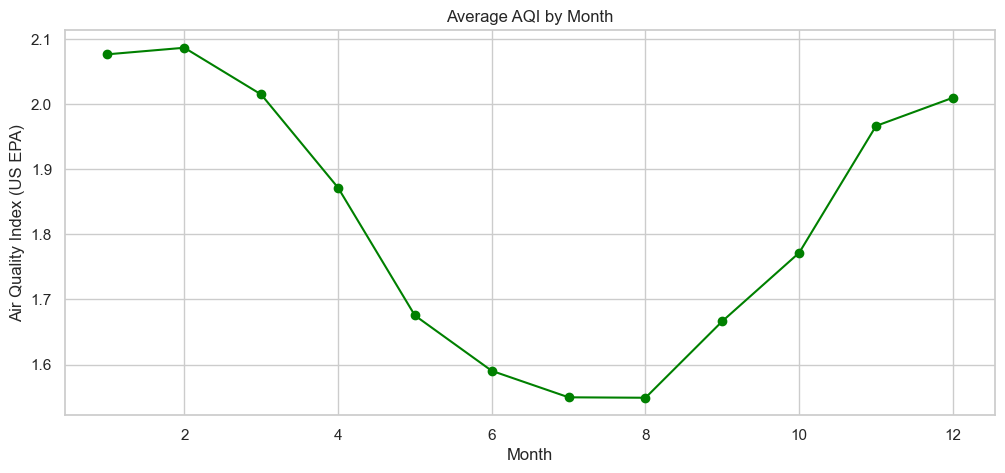

In [12]:
df['date'] = df['last_updated'].dt.date
df['hour'] = df['last_updated'].dt.hour

# Average temperature by hour
hourly_temp = df.groupby('hour')['temperature_celsius'].mean()

plt.figure(figsize=(12,5))
plt.plot(hourly_temp.index, hourly_temp.values, marker='o', color='orange')
plt.title('Average Temperature by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Average AQI by month
df['month'] = df['last_updated'].dt.month
monthly_aqi = df.groupby('month')['air_quality_us-epa-index'].mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_aqi.index, monthly_aqi.values, marker='o', color='green')
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Air Quality Index (US EPA)')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'folium'